# __Employee Attrition Prediction__

## __Group Number:__ 31

__Names of students and index numbers:__    

EG/2020/3882 -: De Silva K.B.L.H.

EG/2020/4266 -: Weerasekara W.M.N.S.




## Import the packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


## Import Data

In [37]:
# CSV file,has been read into a Pandas DataFrame named "df."
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


## Description of data


In [38]:
# Display the first few rows of the Pandas DataFrame "df."
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<u>**meaning of classifications**</u>

__Education :__ 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

__EnvironmentSatisfaction :__ 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__JobInvolvement :__ 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__JobSatisfaction :__ 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__PerformanceRating :__ 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

__RelationshipSatisfaction :__ 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__WorkLifeBalance :__ 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [39]:
#Get dataframe Non-Null Count and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [40]:
#check if there any duplicate rows
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [41]:
#Iterating through each column and prints the column name and the number of unique values 

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

<u>Some of columns can be removed, because their values do not affect the analysis results.</u>

__Over18__: All values are Y

__EmployeeCount__: all values are 1.0

__StandardHours__: all values are 80.0

__EmployeeNumber__: id of the employee do not affect the analysis results.

In [42]:
#drop unnecessary coloums(DATA PRE-PROCESSING)
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [43]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [44]:
#printing the unique values for each category.

for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Non-Travel', 'Travel_Frequently'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  EducationField {'Medical', 'Other', 'Life Sciences', 'Human Resources', 'Marketing', 'Technical Degree'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Manufacturing Director', 'Human Resources', 'Research Scientist', 'Manager', 'Sales Executive', 'Laboratory Technician', 'Research Director', 'Sales Representative', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  OverTime {'Yes', 'No'}


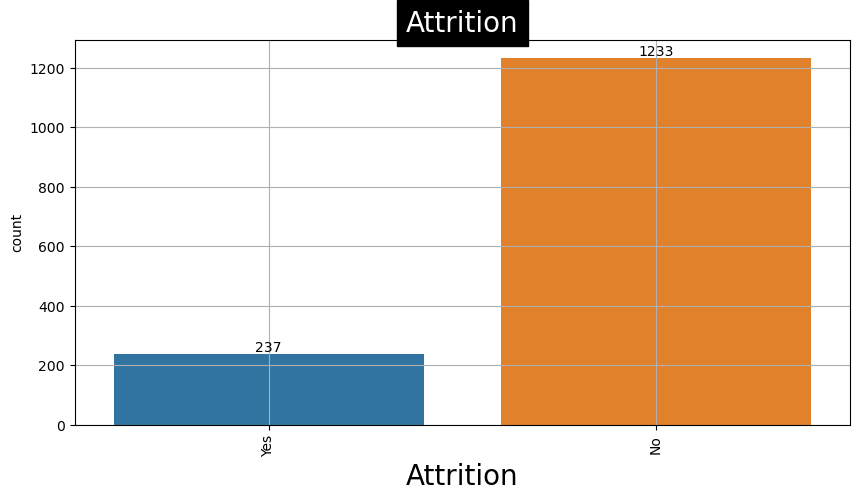

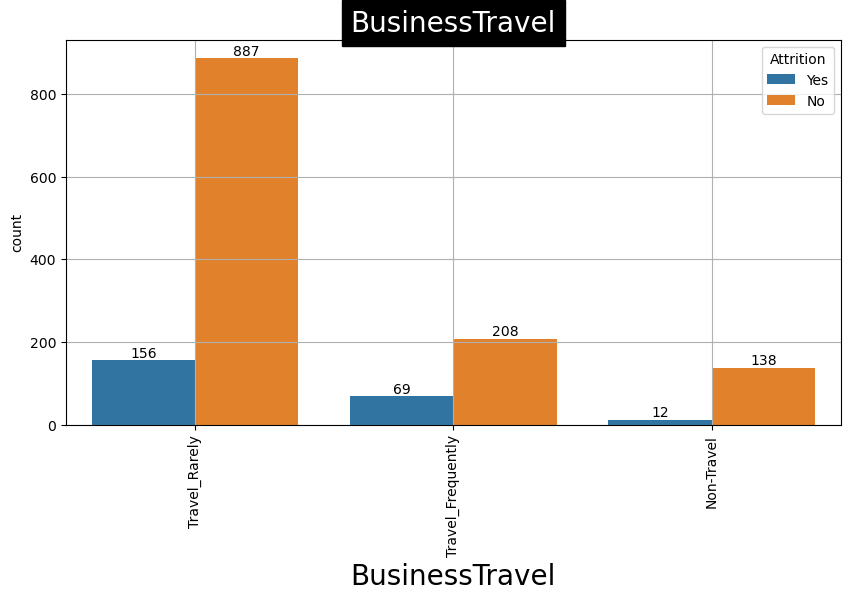

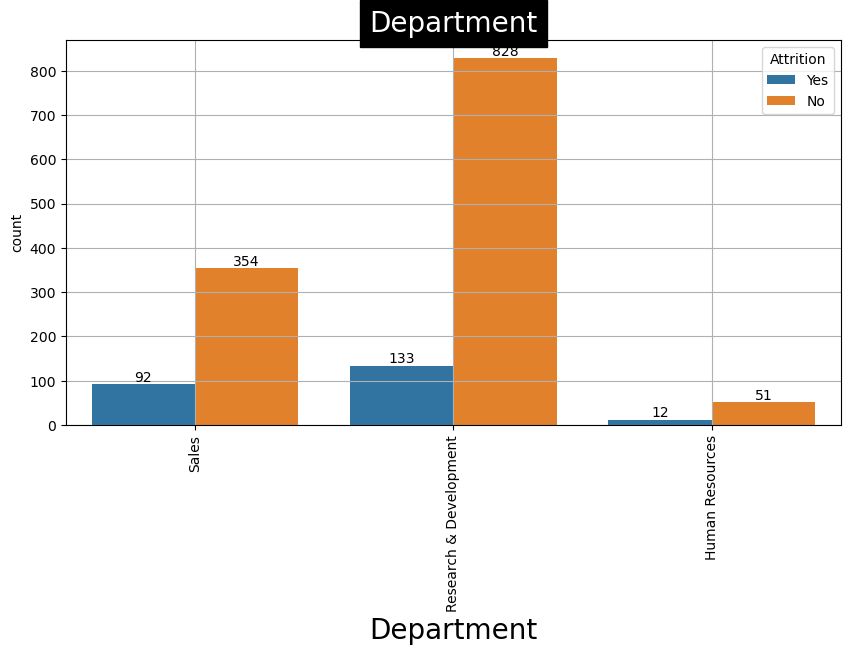

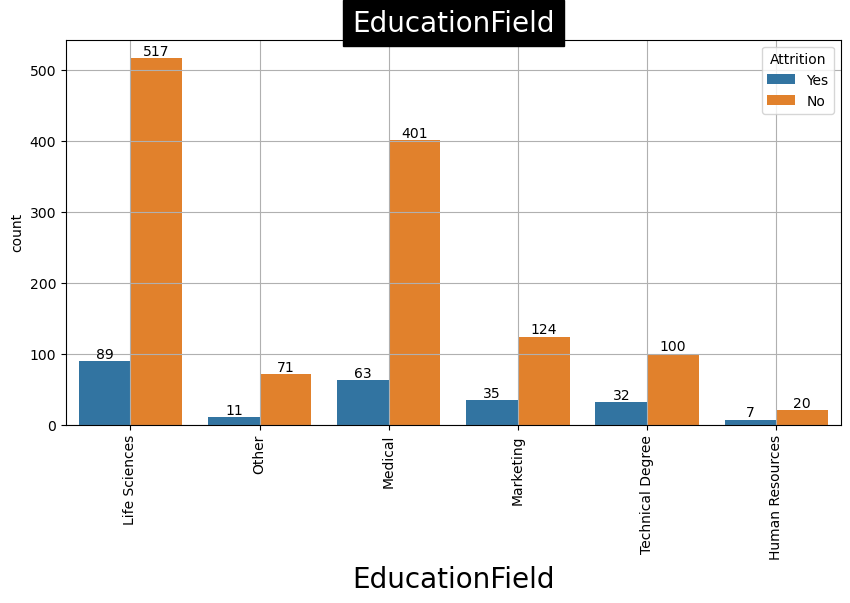

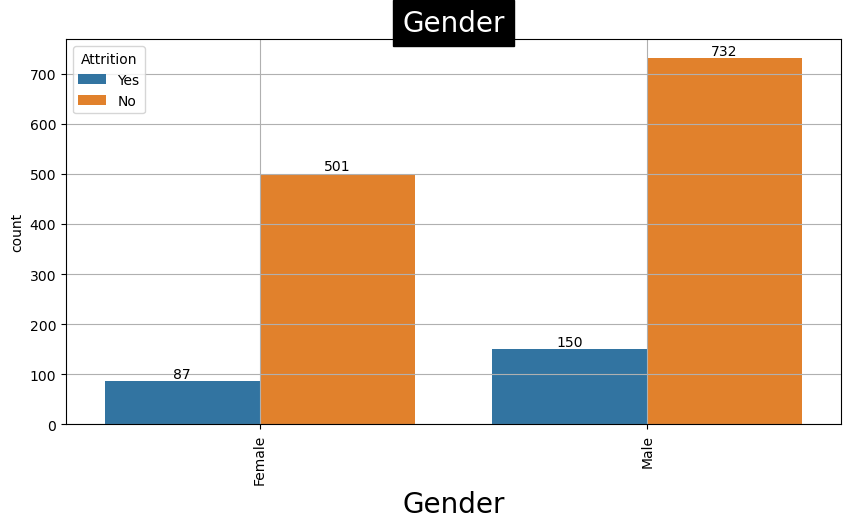

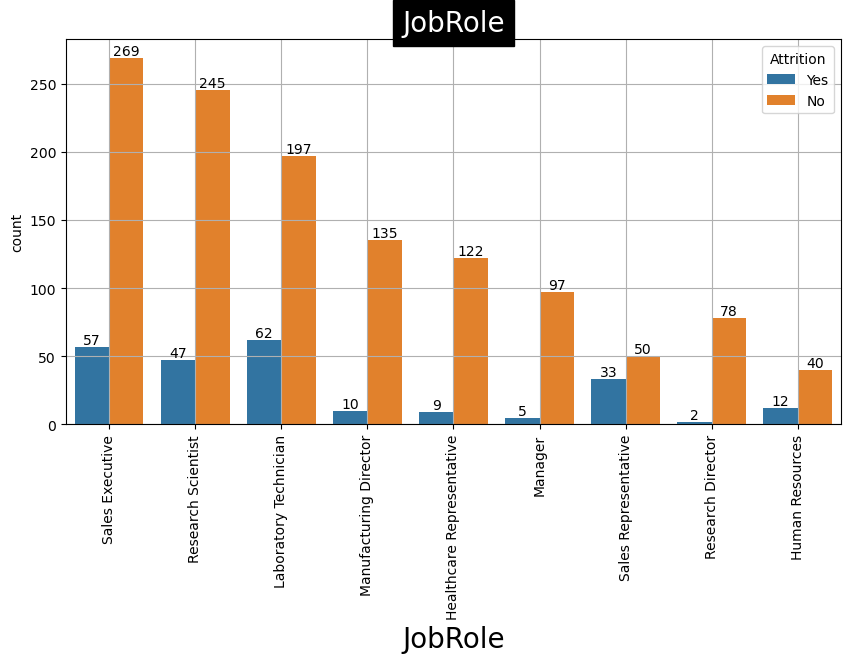

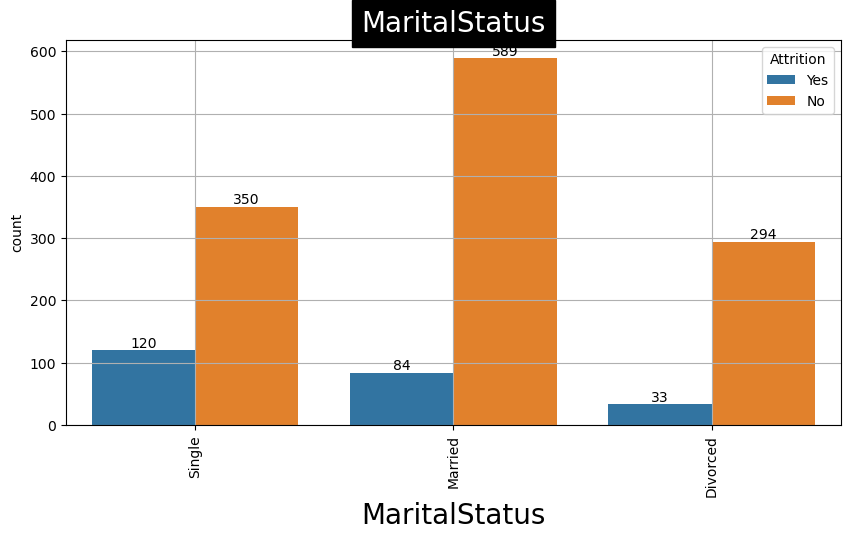

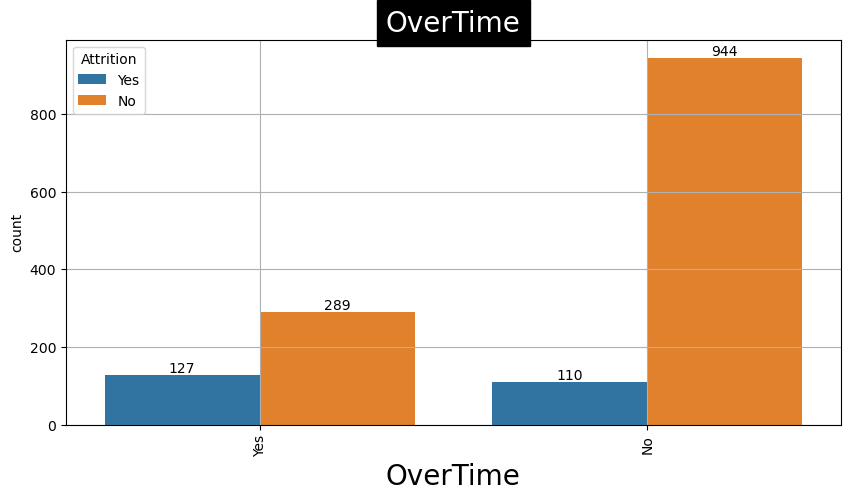

In [45]:
for column in cat : 
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()


## DATA PRE-PROCESSING

In [46]:
#A copy of the Pandas DataFrame "df"
df_copy = df.copy()

In [47]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [48]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus'])

<Axes: >

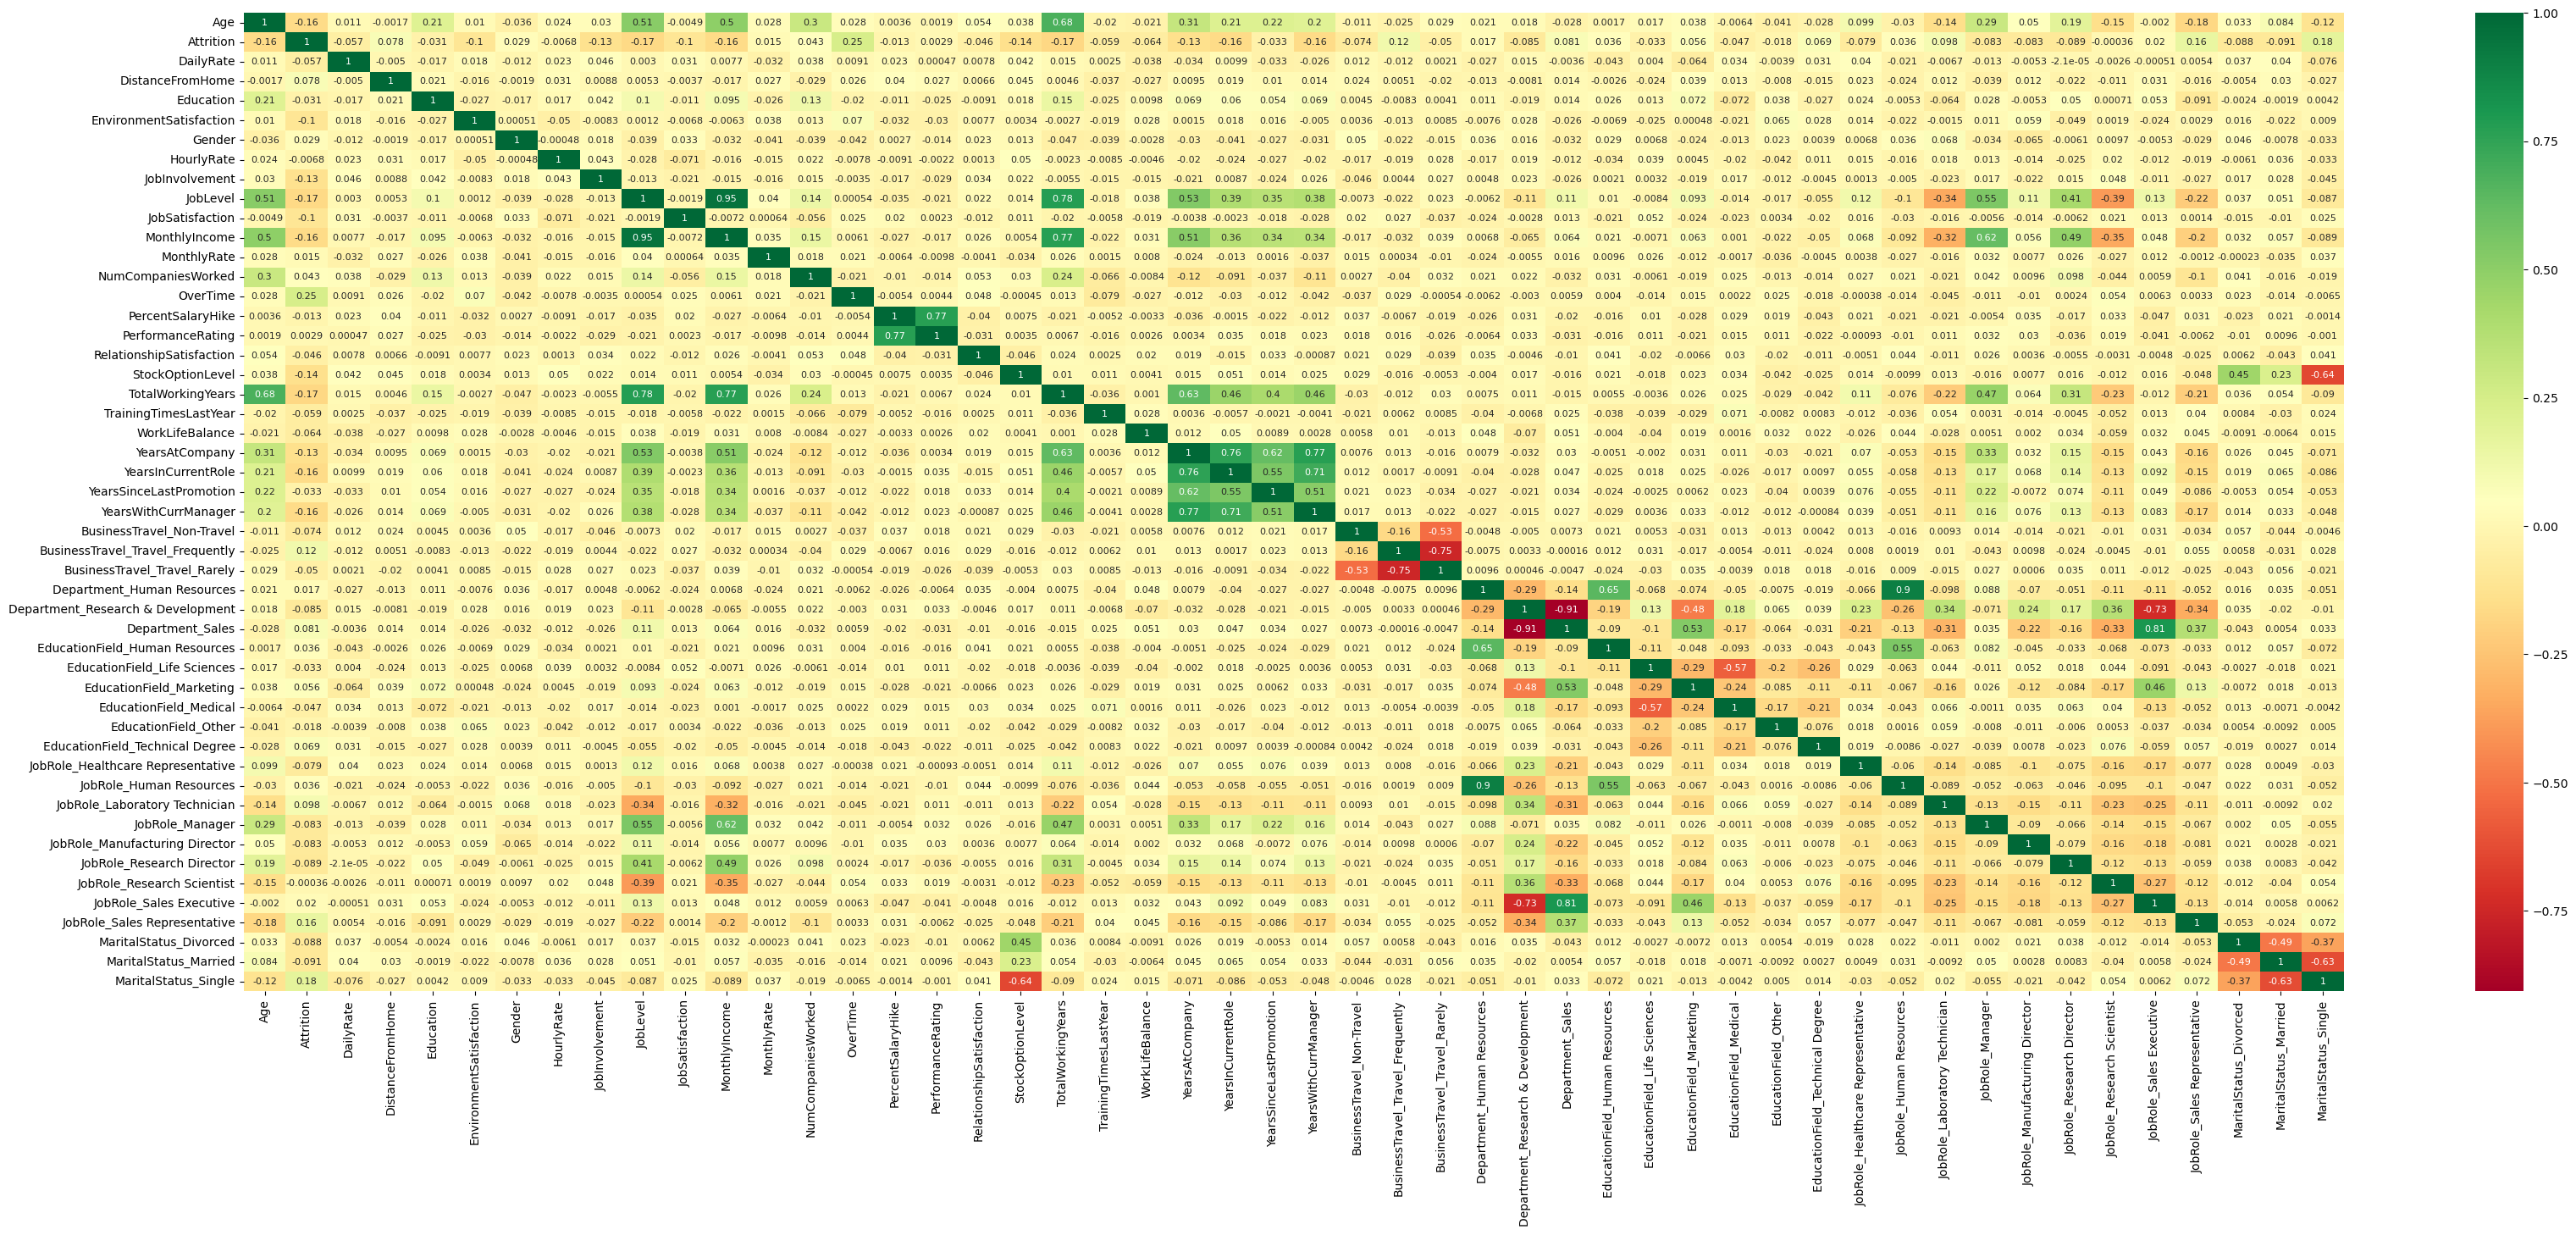

In [49]:
correlations=df_copy.corr()

#Define the figure size 
plt.figure(figsize=(40, 15))

#Display a heatmap to illustrate the correlation between the features.
sns.heatmap(correlations, annot=True, cmap="RdYlGn", annot_kws={"size":8})

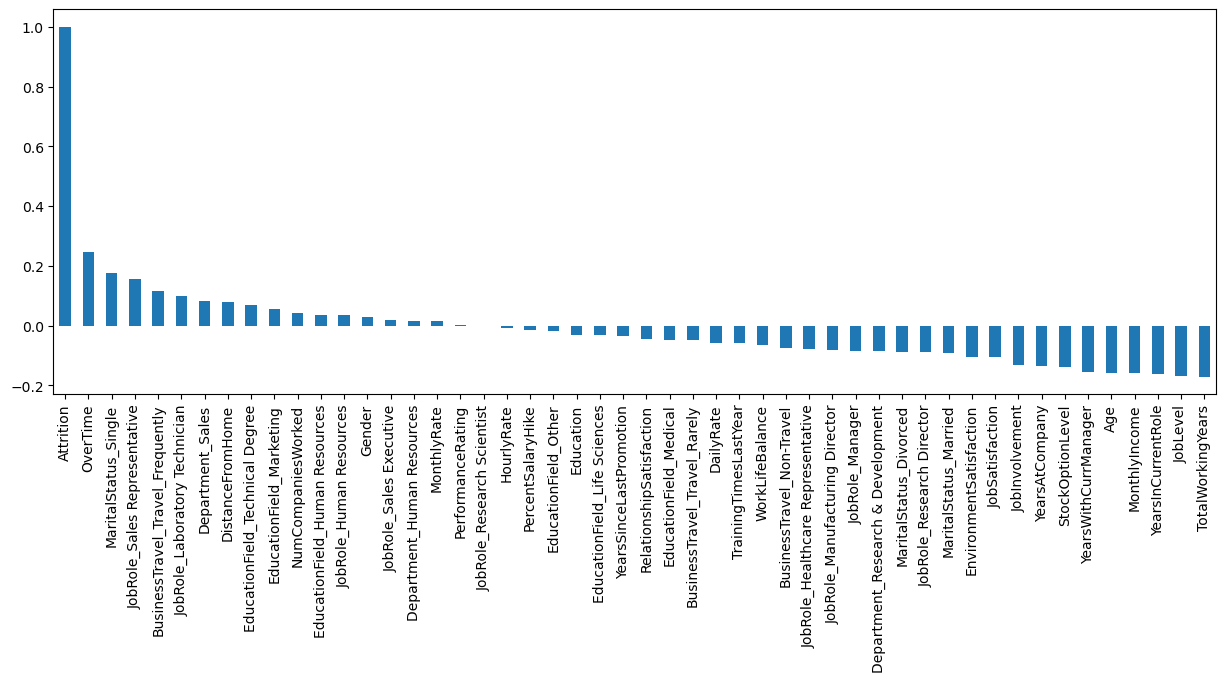

In [50]:
#Bar plot of the correlation values for the 'Attrition' column in the 'correlations' DataFrame, sorted in descending order

plt.figure(figsize=(15,5))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [51]:

# dropping columns that are not correlated with the target
df_copy.drop(['MonthlyRate', 'PerformanceRating', 'JobRole_Research Scientist', 'HourlyRate', 'PercentSalaryHike', 'EducationField_Other'], axis=1, inplace=True)

# dropping YearsInCurrentRole and YearsWithCurrManager as they are strongly correlated with YearsAtCompany
df_copy.drop(['YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)
#(Keeping all three columns might lead to multicollinearity, which can make it difficult for models to distinguish the independent effects of these variables.)

# dropping JobRole_Human Resources to leave Department_Human Resources and JobRole_Sales Executive to leave Department_Sales
df_copy.drop(['JobRole_Human Resources', 'JobRole_Sales Executive'], axis=1, inplace=True)
#(Eliminating redundancy with other columns)

In [52]:
df_copy.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,0.600000,2.729932,2.063946,2.728571,6502.931293,2.693197,0.282993,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,2.187755
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,0.490065,0.711561,1.106940,1.102846,4707.956783,2.498009,0.450606,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.222430
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,0.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,0.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,1.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,1.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000


In [53]:
#normalizing 
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
norm = scaler.fit_transform(df_copy)
norm_df = pd.DataFrame(norm,columns=df_copy.columns)
norm_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.292590,0.478231,0.573923,0.600000,0.576644,0.265986,0.576190,...,0.089796,0.089116,0.176190,0.069388,0.098639,0.054422,0.056463,0.222449,0.457823,0.319728
std,0.217509,0.367863,0.288840,0.289531,0.256041,0.364361,0.490065,0.237187,0.276735,0.367615,...,0.285986,0.285008,0.381112,0.254199,0.298279,0.226925,0.230891,0.416033,0.498387,0.466530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035714,0.250000,0.333333,0.000000,0.333333,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.501074,0.214286,0.500000,0.666667,1.000000,0.666667,0.250000,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.000000,0.755190,0.464286,0.750000,1.000000,1.000000,0.666667,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:

#A feature set 'X' by excluding the 'Attrition' column from the DataFrame
X = norm_df.drop(['Attrition'], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.333333,0.0,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,1.0,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,1.0,0.333333,0.00,0.666667,0.056925,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.0,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,1.0,0.666667,0.00,0.333333,0.129489,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
#Create a target variable 'Y' containing the 'Attrition' values
Y = norm_df['Attrition'].values

<Axes: ylabel='count'>

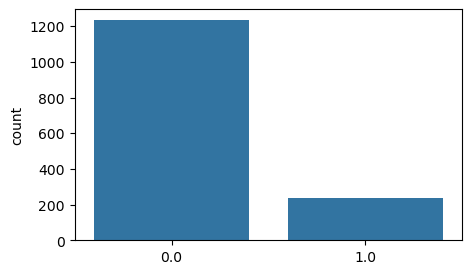

In [56]:
plt.subplots(figsize=(5,3))
sns.countplot(x=Y)

In [57]:
(norm_df['Attrition'].value_counts() / len(df)).round(2)


Attrition
0.0    0.84
1.0    0.16
Name: count, dtype: float64

the target data is imbalanced, giving us 16% of employees who left the company versus 84% who stayed. This by itself can create bias in our models and show high accuracy while majority of of the less represented class will be predicted wrongly.

<Axes: ylabel='count'>

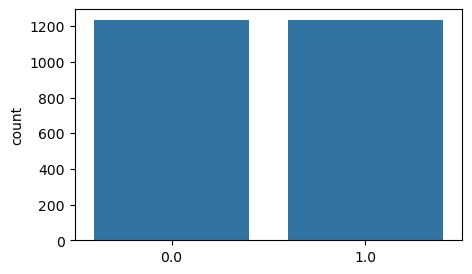

In [58]:
X, Y = SMOTE(sampling_strategy=1, random_state=5).fit_resample(X, Y)
plt.subplots(figsize=(5,3))
sns.countplot(x=Y)

## Splitting the dataset

In [59]:
#Splitting the dataset as 70% for training and 30% for testing with a random state of 13
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

## Training the Model while tuning Hyperparameters

### Random Forest Algorithm

In [60]:
#Specify the parameter grid for the Random Forest classifier.

param_distributions = {
    'n_estimators': [50, 150],# Number of trees in the forest
    'max_depth': [2, 4], # Maximum depth of each tree
    'max_features': ['sqrt', 'log2', 0.5],# Number of features considered at each split
    'min_samples_split': [3, 5 ], # Minimum samples required to split a node
    'min_samples_leaf': [2, 3, 4], # Minimum samples required at a leaf node
    'bootstrap': [True, False] # Whether to use bootstrap sampling
}


#Initilizing gridsearchCV using cross-validation (cv=5) on a RandomForestClassifier with specified parameter distributions, and the scoring metric is set to accuracy.
grid_search_randomForest  = GridSearchCV(RandomForestClassifier(), param_distributions, cv=5 , scoring='accuracy')

#Fitting the grid search to the data
grid_search_randomForest .fit(X_train, Y_train)

print("Best hyperparameters:", grid_search_randomForest .best_params_)

#Displaying the best accuracy for train data
print("Best accuracy score:", grid_search_randomForest .best_score_)


Best hyperparameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Best accuracy score: 0.8760056965736783


In [62]:
#Evaluating the model on the test set
test_accuracy_RF = grid_search_randomForest.score(X_test, Y_test)

#Displaying the test accuracy for the best model
print("Test Accuracy:", test_accuracy_RF)

Test Accuracy: 0.85


In [63]:
#Defining best model using best hyperparameters
randomForest_best = RandomForestClassifier(bootstrap = True, max_depth = 4, max_features= 'sqrt', min_samples_split= 4, min_samples_leaf= 5, n_estimators= 150)

#Training the dataset using the best hyperparameters
randomForest_best.fit(X_train , Y_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=150)

In [64]:
train_accuracy = metrics.accuracy_score(Y_train, randomForest_best.predict(X_train))
test_accuracy = metrics.accuracy_score(Y_test, randomForest_best.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8928157589803013
Test Accuracy: 0.8527027027027027


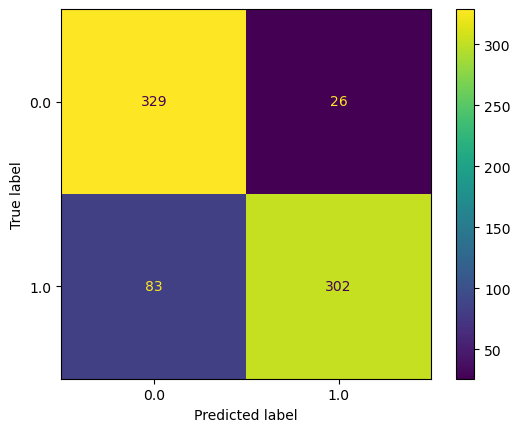

In [65]:
#Getting confusion metrics for predictions
confusion_metrics = metrics.confusion_matrix(Y_test , randomForest_best.predict(X_test))

#Plotting the confusion metric 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_metrics, display_labels=randomForest_best.classes_ )
disp.plot()

plt.show()

In [66]:
print(metrics.classification_report(Y_test, randomForest_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       355
         1.0       0.92      0.78      0.85       385

    accuracy                           0.85       740
   macro avg       0.86      0.86      0.85       740
weighted avg       0.86      0.85      0.85       740



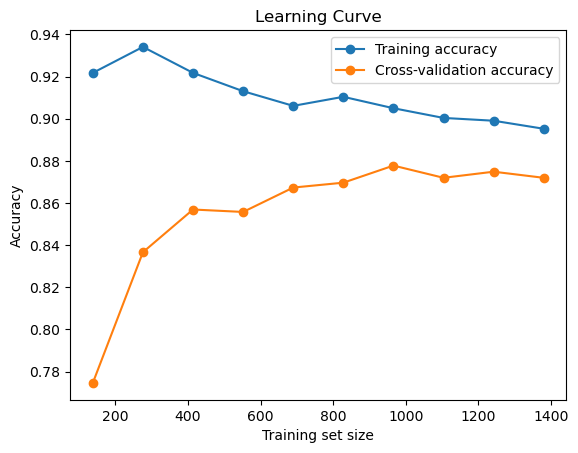

In [68]:

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=randomForest_best,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Adjust number of training sizes as needed
    cv=5,  # Cross-validation with 5 folds
    scoring='accuracy'  # Use accuracy as the scoring metric
)

# Calculate mean scores for training and test sets
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curves without mean parts
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation accuracy')

plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Logistic Regression Algorithm

In [69]:
#Defining the parameter grid for hyperparameter tunning
param_grid = {
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],#Algorithm to use in optimization
    'penalty': ['l1', 'l2', 'elasticnet'],#Specify the norm of Penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],#Inverse regularization strength
    'max_iter': [1000, 5000, 10000]#maximum num of iteration
}
#Initilizing gridsearchCV using cross-validation (cv=5) on a Logistic Regression with specified parameter grid, and the scoring metric is set to accuracy.
grid_search_LR  = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring='accuracy')

#Fitting the grid search to the data
grid_search_LR .fit(X_train, Y_train)

print("Best hyperparameters:", grid_search_LR .best_params_)

#Displaying the best accuracy for train data
print("Best accuracy score:", grid_search_LR .best_score_)



Best hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score: 0.8024143419619669


In [71]:
#Evaluating the model on the test set
test_accuracy_LR = grid_search_LR.score(X_test, Y_test)

#Displaying the test accuracy for the best model
print("Test Accuracy:", test_accuracy_LR)

Test Accuracy: 0.7986486486486486


In [72]:
#Defining best model using best hyperparameters
LogisticRegression_best = LogisticRegression(C= 1, max_iter= 1000, penalty= 'l2', solver= 'liblinear')

#Training the dataset using the best hyperparameters
LogisticRegression_best.fit(X_train , Y_train)


LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [73]:
train_accuracy_LR = metrics.accuracy_score(Y_train, LogisticRegression_best.predict(X_train))
test_accuracy_LR = metrics.accuracy_score(Y_test, LogisticRegression_best.predict(X_test))

print("Training Accuracy:", train_accuracy_LR)
print("Test Accuracy:", test_accuracy_LR)

Training Accuracy: 0.8192352259559675
Test Accuracy: 0.7986486486486486


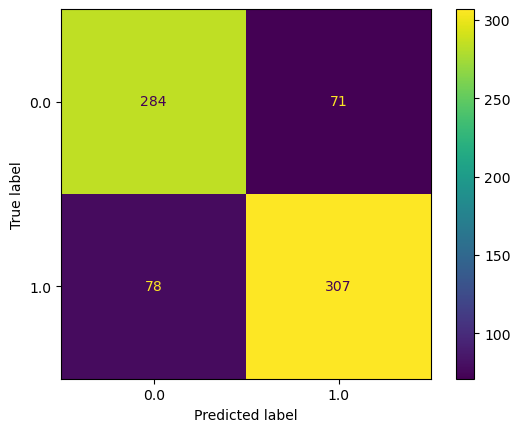

In [74]:
#Getting confusion metrics for predictions
confusion_metrics = metrics.confusion_matrix(Y_test , LogisticRegression_best.predict(X_test))
#Plotting the confusion metric 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_metrics, display_labels=LogisticRegression_best.classes_ )
disp.plot()

plt.show()

In [75]:
print(metrics.classification_report(Y_test, LogisticRegression_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       355
         1.0       0.81      0.80      0.80       385

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



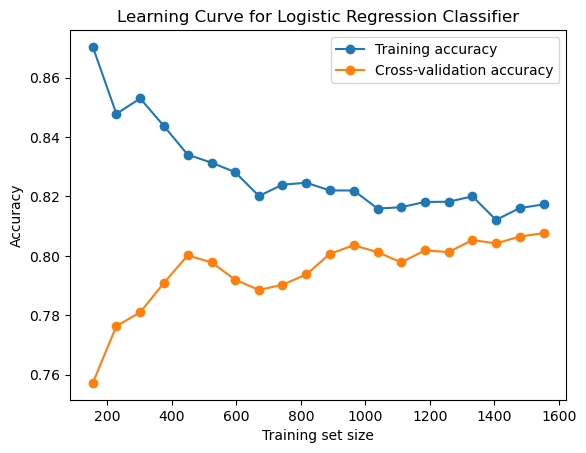

In [76]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression_best,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 20),  # 20 training sizes for a smoother curve
    cv=10,  # 10-fold cross-validation for more robust estimates
    scoring='accuracy'
)

# Plot learning curves without mean parts
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation accuracy')

plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression Classifier")
plt.legend()
plt.show()

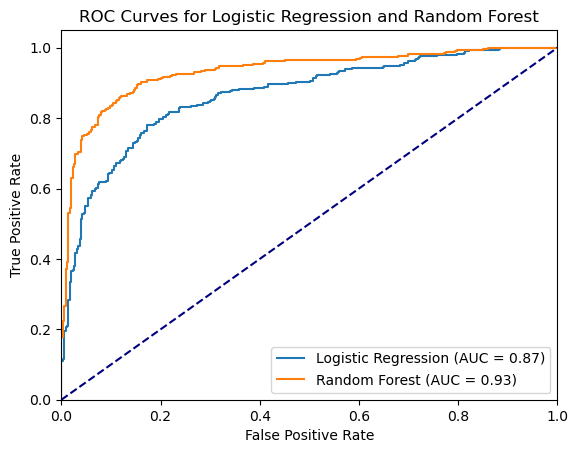

In [78]:
# Predict probabilities for the positive class
log_reg_probabilities = LogisticRegression_best.predict_proba(X_test)[:, 1]
rf_probabilities = randomForest_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(Y_test, log_reg_probabilities)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for Logistic Regression and Random Forest
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()